In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


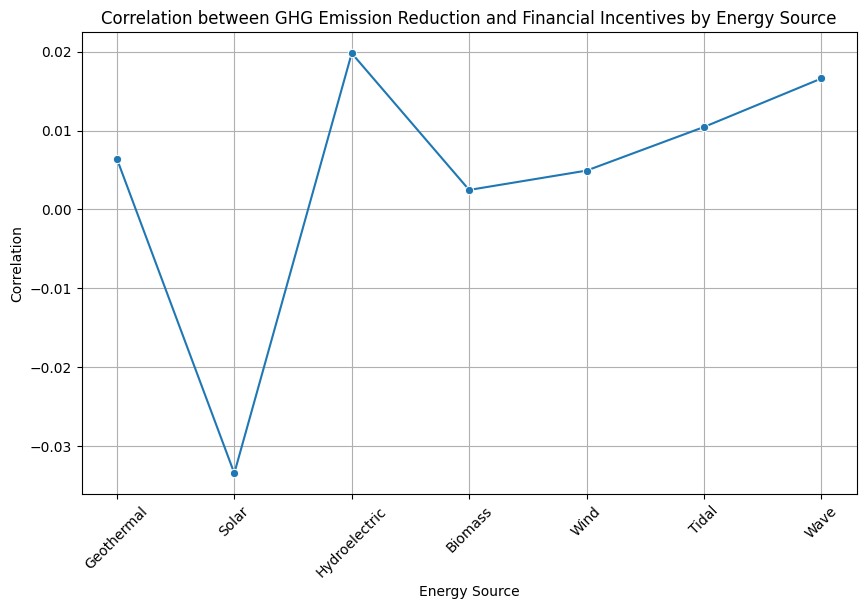

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/My Drive/energy_dataset_.csv')

# Map numerical codes to energy source names
energy_source_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}
data['Energy_Source'] = data['Type_of_Renewable_Energy'].map(energy_source_map)

# Calculate the correlation for each energy source
correlation_data = []
for energy_source in data['Energy_Source'].unique():
    subset = data[data['Energy_Source'] == energy_source]
    correlation = subset[['GHG_Emission_Reduction_tCO2e', 'Financial_Incentives_USD']].corr().iloc[0, 1]
    correlation_data.append((energy_source, correlation))

# Convert to DataFrame for plotting
correlation_df = pd.DataFrame(correlation_data, columns=['Energy_Source', 'Correlation'])

# Plot the correlation using a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Energy_Source', y='Correlation', data=correlation_df, marker='o')
plt.title('Correlation between GHG Emission Reduction and Financial Incentives by Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

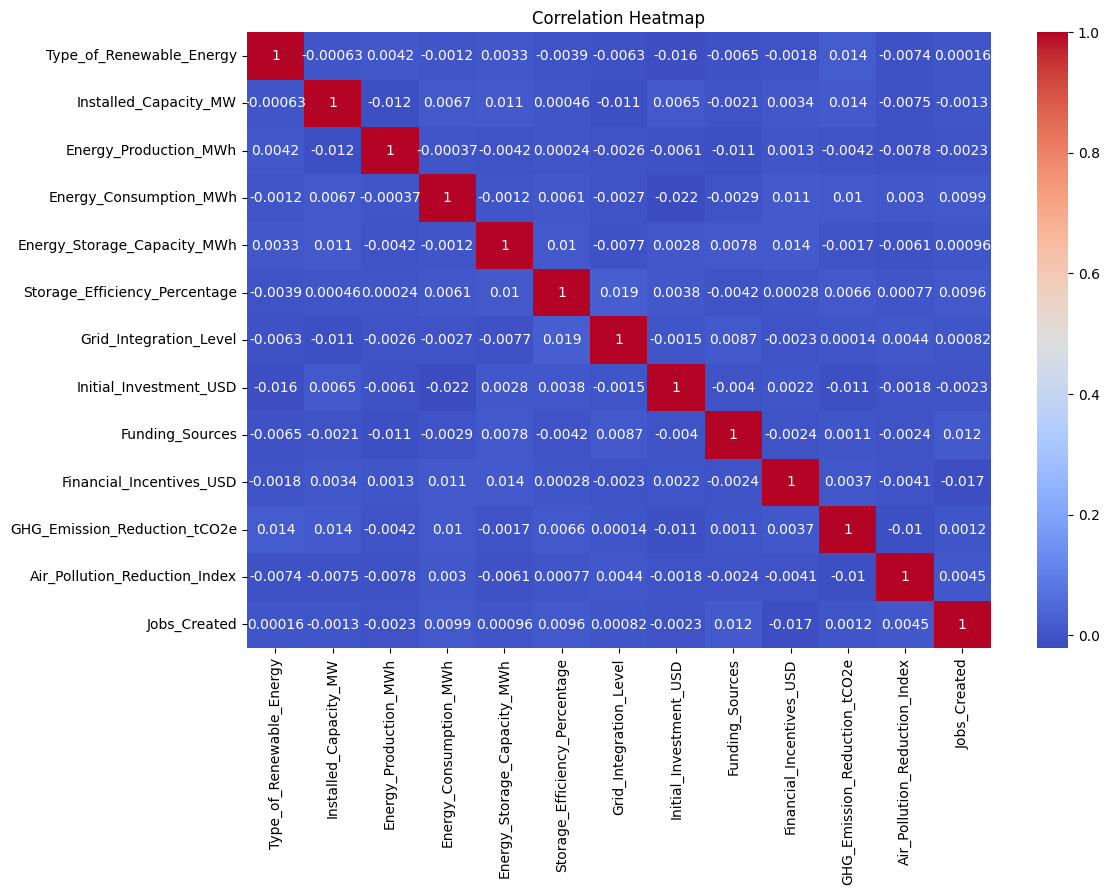

<ipython-input-12-17e3f280053b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Energy_Production_MWh', y='Energy_Source', data=energy_production_summary, palette='viridis')


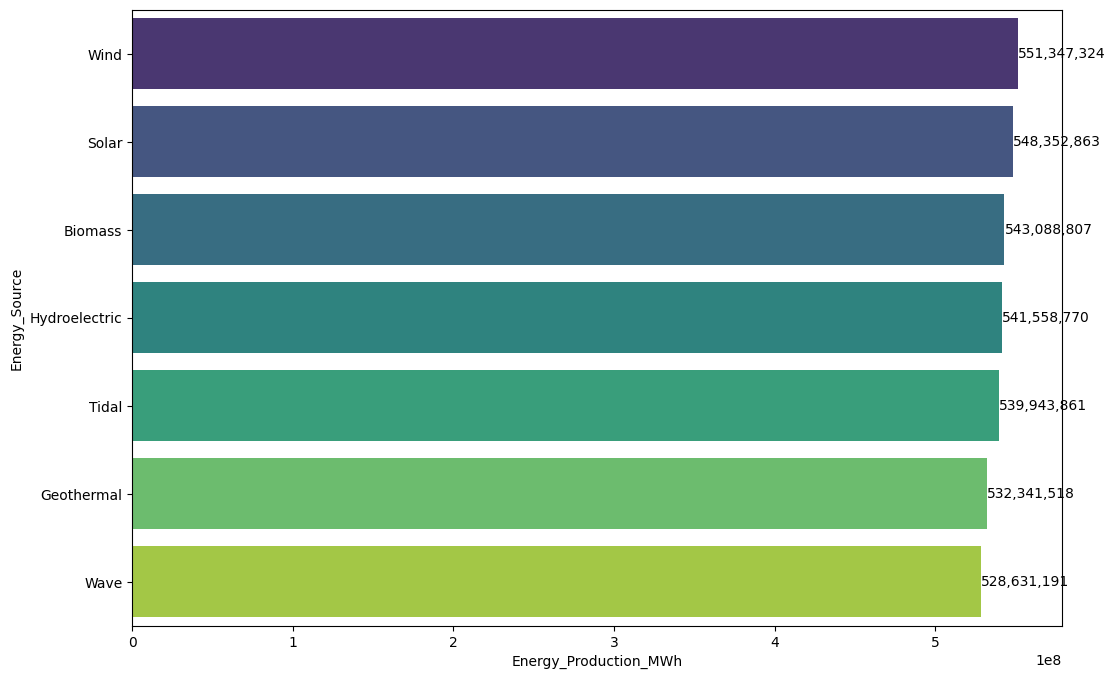

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/energy_dataset_.csv')

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Energy Production vs. Consumption
energy_source_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}
data['Energy_Source'] = data['Type_of_Renewable_Energy'].map(energy_source_map)
energy_production_summary = data.groupby('Energy_Source')['Energy_Production_MWh'].sum().reset_index()
energy_production_summary = energy_production_summary.sort_values(by='Energy_Production_MWh', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Energy_Production_MWh', y='Energy_Source', data=energy_production_summary, palette='viridis')
for index, value in enumerate(energy_production_summary['Energy_Production_MWh']):
    plt.text(value, index, f'{value:,.0f}', color='black', ha="left", va="center")



Mean Squared Error: 1.3267556586253824e-08
R^2 Score: -0.09517288079085096


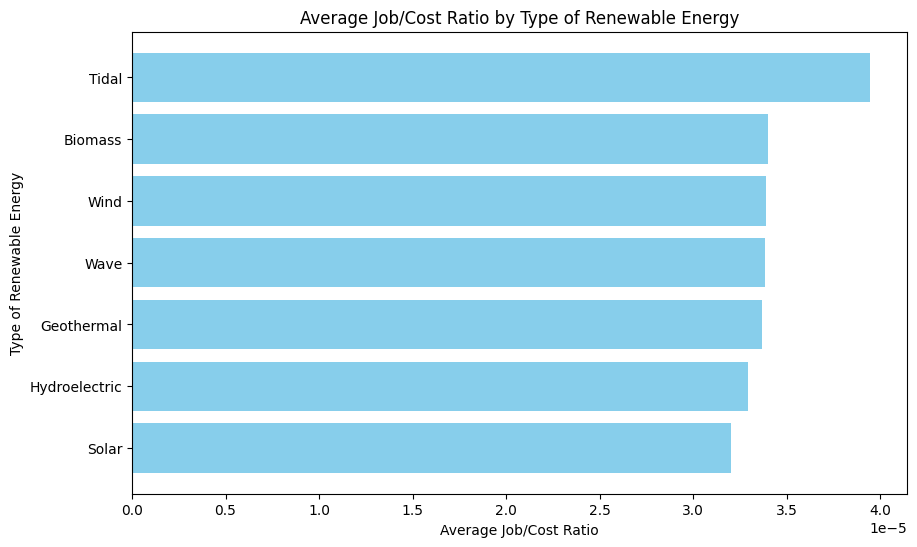

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/energy_dataset_.csv')

# Job/cost ratio
data['Job_Cost_Ratio'] = data['Jobs_Created'] / data['Initial_Investment_USD']

# Select features and target
features = data[['Type_of_Renewable_Energy', 'Installed_Capacity_MW', 'Energy_Production_MWh', 'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage', 'Grid_Integration_Level', 'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e', 'Air_Pollution_Reduction_Index']]
target = data['Job_Cost_Ratio']

# One-hot encode categorical variables if necessary
features = pd.get_dummies(features, columns=['Type_of_Renewable_Energy', 'Grid_Integration_Level'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Create a DataFrame to store predictions for each type of renewable energy
types_of_energy = {
    1: 'Solar', 2: 'Wind', 3: 'Hydroelectric', 4: 'Geothermal',
    5: 'Biomass', 6: 'Tidal', 7: 'Wave'
}

average_ratios = []

for type_code, type_name in types_of_energy.items():
    sample_features = features.copy()
    sample_features['Type_of_Renewable_Energy_' + str(type_code)] = 1

    # Set other type columns to 0
    for other_type_code in types_of_energy:
        if other_type_code != type_code:
            sample_features['Type_of_Renewable_Energy_' + str(other_type_code)] = 0

    # Predict the job/cost ratio for this type of renewable energy
    sample_features = scaler.transform(sample_features)
    predicted_ratios = model.predict(sample_features)
    avg_ratio = np.mean(predicted_ratios)

    average_ratios.append((type_name, avg_ratio))

# Sort the average_ratios by the job/cost ratio
average_ratios.sort(key=lambda x: x[1], reverse=True)

# Extract the names and ratios for plotting
types = [x[0] for x in average_ratios]
ratios = [x[1] for x in average_ratios]

# Plot the average job/cost ratios
plt.figure(figsize=(10, 6))
plt.barh(types, ratios, color='skyblue')
plt.xlabel('Average Job/Cost Ratio')
plt.ylabel('Type of Renewable Energy')
plt.title('Average Job/Cost Ratio by Type of Renewable Energy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ratio on top
plt.show()


Tidal energy shows the highest job/investment ratio which would be beneficial for economies in costal areas looking to invest in government projects